#### 1.1.4 timedelta 对象
- 表示两个日期或时间之间的间隔
- 语法：
  > - datetime.timedelta(days=0, seconds=0, microseconds=0, milliseconds=0, minutes=0, hours=0, weeks=0) 
  > - 以上所有的参数都是可选的（默认为 0），参数的可以是整数或浮点数，正数或负数。

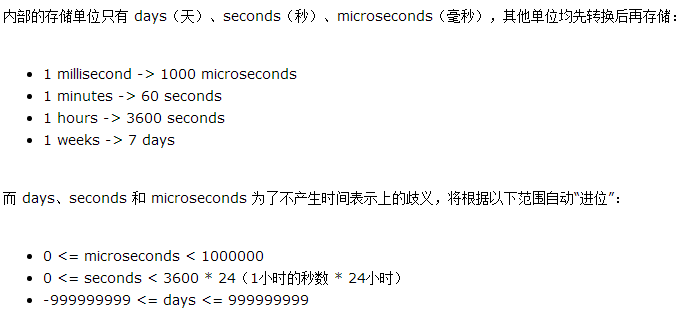

In [57]:
Image(filename="py35_picture\chap-111-1.png")

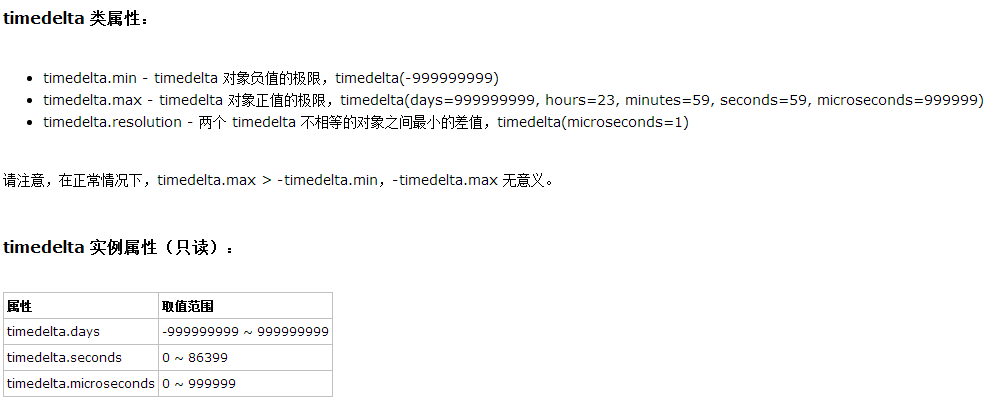

In [58]:
Image(filename="py35_picture\chap-111-2.png")

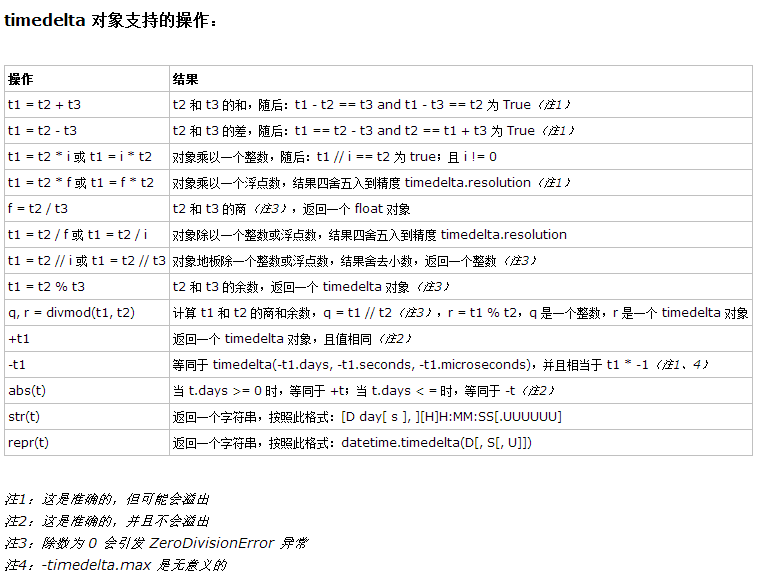

In [59]:
Image(filename="py35_picture\chap-111-3.png")

In [61]:
from datetime import timedelta

year = timedelta(days=365)
another_year = timedelta(weeks=40, days=84, hours=23,
                         minutes=50, seconds=600)  # adds up to 365 days

year.total_seconds()

31536000.0

In [64]:
print(year == another_year)

ten_years = 10 * year
print(ten_years)
print(ten_years, ten_years.days // 365)

nine_years = ten_years - year
print(nine_years)
print(nine_years, nine_years.days // 365)

three_years = nine_years // 3
print(three_years)
print(three_years, three_years.days // 365)

print(abs(three_years - ten_years) == 2 * three_years + year)

True
3650 days, 0:00:00
3650 days, 0:00:00 10
3285 days, 0:00:00
3285 days, 0:00:00 9
1095 days, 0:00:00
1095 days, 0:00:00 3
True


In [60]:
d = dt.datetime(2017,1,10,11,12,25,50000)
td = d - dt.datetime.now() # timedelta 对象，由其他日期-时间相关对象的数学运算得到
print(td)
print(type(td))

print(td.days)
print(td.seconds)
print(td.microseconds)
print(td.total_seconds()) # 返回 timedelta 对象所包含的总秒数，相当于 td / timedelta(seconds=1)
# 请注意，对于非常大的时间间隔（在大多数平台上是大于270年），这种方法将失去微秒（microsecond）精度

-1 day, 22:15:50.141949
<class 'datetime.timedelta'>
-1
80150
141949
-6249.858051


#### 1.1.5 date 对象
- 表示一个日期，在一个理想化的日历里，日期由 year（年）、month（月）、day（日）组成
- 语法：
  > - datetime.date(year, month, day)
  > - 所有的参数都是必需的，参数可以是整数，并且在以下范围内：
  > > - MINYEAR <= year <= MAXYEAR（也就是 1 ~ 9999）
  > > - 1 <= month <= 12
  > > - 1 <= day <= 根据 year 和 month 来决定（例如 2015年2月 只有 28 天）

##### 1.1.5.1  date 实例方法：
- date.replace(year, month, day)
  > 生成一个新的日期对象，用参数指定的年、月、日代替原有对象中的属性
- date.timetuple()
  > 返回日期对应的 time.struct_time 对象（类似于 time 模块的 time.localtime()）
- date.toordinal()
  > 返回日期对应的 Gregorian Calendar 日期
- date.weekday()
  > 返回 0 ~ 6 表示星期几（星期一是 0，依此类推）
- date.isoweekday()
  > 返回 1 ~ 7 表示星期几（星期一是1， 依此类推）
- date.isocalendar()
  > 返回一个三元组格式 (year, month, day)
- date.isoformat()
  > 返回一个 ISO 8601 格式的日期字符串，如 "YYYY-MM-DD" 的字符串
- date.\__str\__()
  > 对于 date 对象 d 来说，str(d) 相当于 d.isoformat()
- date.ctime()
  > 返回一个表示日期的字符串，相当于 time 模块的 time.ctime(time.mktime(d.timetuple()))
- date.strftime(format)
  > 返回自定义格式化字符串表示日期，下面有详解
- date.\__format\__(format)
  > 跟 date.strftime(format) 一样，这使得调用 str.format() 时可以指定 data 对象的字符串

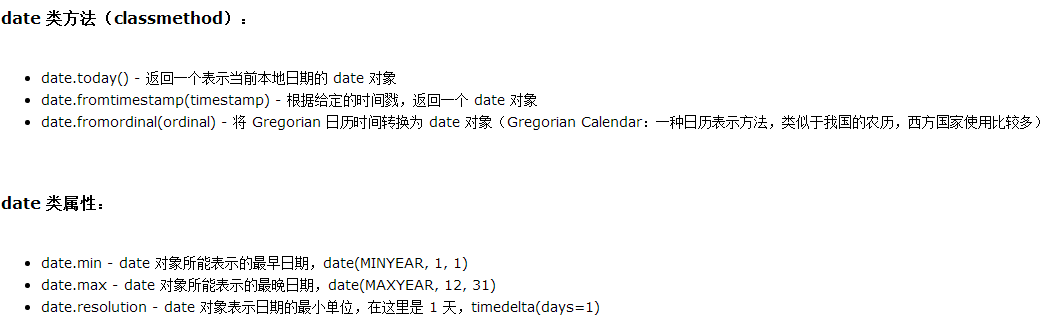

In [66]:
Image(filename="py35_picture\chap-111-4.png")

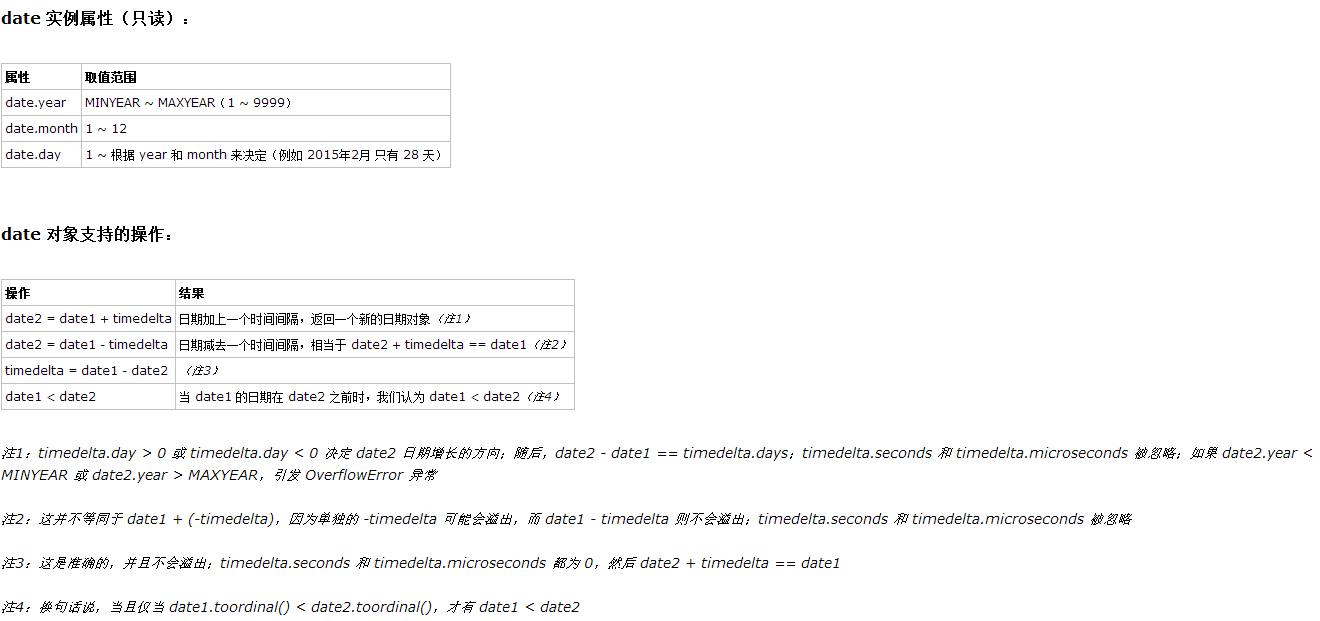

In [65]:
Image(filename="py35_picture\chap-111-5.png")

In [71]:
import time
from datetime import date

today = date.today()
print(today)

print(today == date.fromtimestamp(time.time()))
my_birthday = date(today.year, 6, 24)
print(my_birthday)

if my_birthday < today:
    my_birthday = my_birthday.replace(year = today.year + 1)
print(my_birthday)

time_to_birthday = abs(my_birthday - today)
time_to_birthday.days

2017-01-10
True
2017-06-24
2017-06-24


165

In [79]:
from datetime import date

d = date.fromordinal(735678)  # 自日期 1.1.0001 之后的第 735678 天
print(d);print()

t = d.timetuple()
print(t);print()   
for i in t:
    print(i)
    
print()
ic = d.isocalendar()
print(ic);print()
for i in ic:
    print(i)
    
print()
print(d.isoformat());print()
print(d.strftime("%d/%m/%y"));print()
print(d.strftime("%A %d. %B %Y"));print()
print('The {1} is {0:%d}, the {2} is {0:%B}.'.format(d, "day", "month"))

2015-03-21

time.struct_time(tm_year=2015, tm_mon=3, tm_mday=21, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=5, tm_yday=80, tm_isdst=-1)

2015
3
21
0
0
0
5
80
-1

(2015, 12, 6)

2015
12
6

2015-03-21

21/03/15

Saturday 21. March 2015

The day is 21, the month is March.


#### 1.1.6 time  对象
- 表示一天中的一个时间，并且可以通过 tzinfo 对象进行调整
- 语法：
  > - datetime.time(hour=0, minute=0, second=0, microsecond=0, tzinfo=None)
  > - 所有的参数都是可选的；tzinfo 可以是 None 或者 tzinfo 子类的实例对象；其余的参数可以是整数，并且在以下范围内：
  > > - 0 <= hour < 24
  > > - 0 <= minute < 60
  > > - 0 <= second < 60
  > > - 0 <= microsecond < 1000000
  > - 注：如果参数超出范围，将引发 ValueError 异常

##### 1.1.6.1 time 实例方法：
- time.replace([hour[, minute[, second[, microsecond[, tzinfo]]]]]) 
  > 生成一个新的时间对象，用参数指定时间代替原有对象中的属性
- time.isoformat()
  > 返回一个 ISO 8601 格式的日期字符串，如 "HH:MM:SS.mmmmmm" 的字符串
- time.\__str\__()
  > 对于 time 对象 t 来说，str(t) 相当于 t.isoformat()
- time.strftime(format)
  > 返回自定义格式化字符串表示时间，下面有详解
- time.\__format\__(format)
  > 跟 time.strftime(format) 一样，这使得调用 str.format() 时可以指定 time 对象的字符串
- time.utcoffset()
  > 如果 tzinfo 属性是 None，则返回 None；否则返回 self.tzinfo.utcoffset(self)
- time.dst()
  > 如果 tzinfo 属性是 None，则返回 None；否则返回 self.tzinfo.dst(self)
- time.tzname()
  > 如果 tzinfo 属性是 None，则返回 None；否则返回 self.tzinfo.tzname(self)

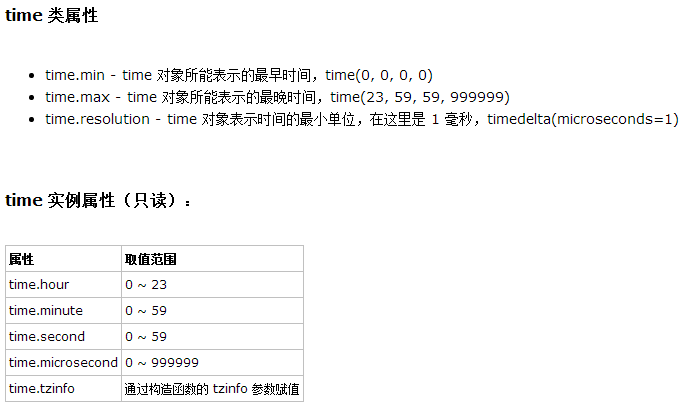

In [80]:
Image(filename="py35_picture\chap-111-6.png")

In [84]:
from datetime import time, timedelta, tzinfo

class GMT1(tzinfo):
    def utcoffset(self, dt):
            return timedelta(hours=1)
    def dst(self, dt):
            return timedelta(0)
    def tzname(self, dt):
            return "欧洲/布拉格"

t = time(14, 10, 30, tzinfo=GMT1())
print(t);print()

gmt = GMT1()
print(gmt);print()
print(t.isoformat());print()
print(t.dst());print()
print(t.tzname());print()

# print(t.strftime("%H:%M:%S %Z"));print()
print('The {} is {:%H:%M}.'.format("time", t))

14:10:30+01:00


14:10:30+01:00

0:00:00

欧洲/布拉格

The time is 14:10.


#### 1.1.7 格式化字符串：strftime() 和 strptime()
- date, datetime, 和 time 对象均支持使用 strftime(format) 方法，将指定的日期或时间转换为自定义的格式化字符串
- 相反的，datetime.strptime() 类方法却是把格式化字符串转换为 datetime 对象

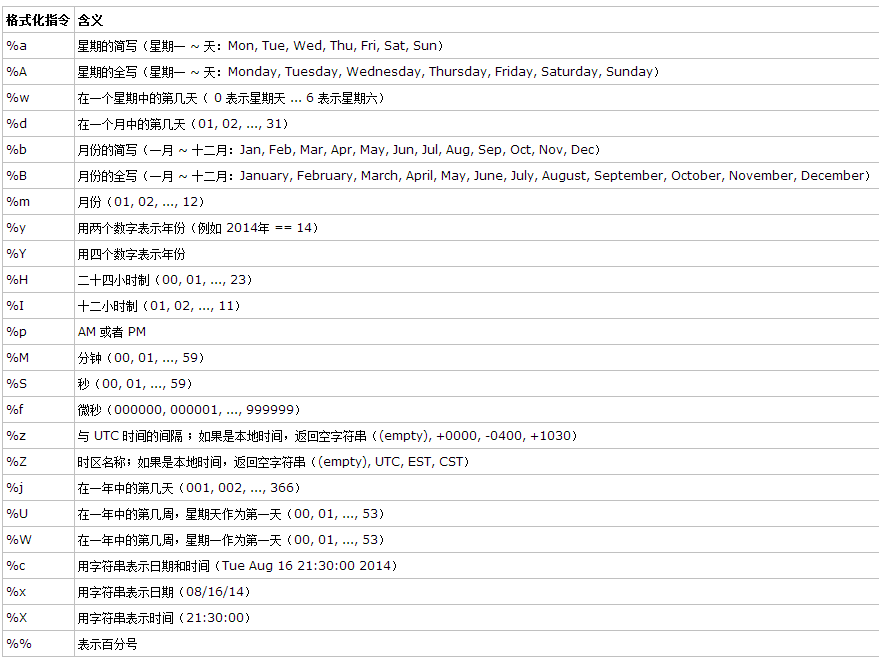

In [105]:
Image(filename="py35_picture\chap-111-9.png")

In [106]:
from datetime import datetime

dt = datetime.now()

print('(%Y-%m-%d %H:%M:%S %f): ', dt.strftime('%Y-%m-%d %H:%M:%S %f'))
print('(%Y-%m-%d %H:%M:%S %p): ', dt.strftime('%y-%m-%d %I:%M:%S %p'))

(%Y-%m-%d %H:%M:%S %f):  2017-01-10 13:48:24 096703
(%Y-%m-%d %H:%M:%S %p):  17-01-10 01:48:24 PM


In [107]:
print('%%a: %s ' % dt.strftime('%a'))
print('%%A: %s ' % dt.strftime('%A'))
print('%%b: %s ' % dt.strftime('%b'))
print('%%B: %s ' % dt.strftime('%B'))

%a: Tue 
%A: Tuesday 
%b: Jan 
%B: January 


In [108]:
print('日期时间%%c: %s ' % dt.strftime('%c'))
print('日期%%x：%s ' % dt.strftime('%x'))
print('时间%%X：%s ' % dt.strftime('%X'))

日期时间%c: Tue Jan 10 13:48:24 2017 
日期%x：01/10/17 
时间%X：13:48:24 


In [109]:
print('今天是这周的第%s天 ' % dt.strftime('%w'))
print('今天是今年的第%s天 ' % dt.strftime('%j'))
print('今周是今年的第%s周 ' % dt.strftime('%U'))

今天是这周的第2天 
今天是今年的第010天 
今周是今年的第02周 
